In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

--2020-08-09 06:58:52--  https://lazyprogrammer.me/course_files/sp500sub.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 104.31.80.48, 172.67.213.166, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25473876 (24M) [text/csv]
Saving to: ‘sp500sub.csv’

sp500sub.csv        100%[===================>]  24.29M  20.4MB/s    in 1.2s    

2020-08-09 06:58:54 (20.4 MB/s) - ‘sp500sub.csv’ saved [25473876/25473876]



In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 5.2MB/s 
     |████████████████████████████████| 8.7MB 16.7MB/s 
     |████████████████████████████████| 2.1MB 45.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [ ]:
import pmdarima as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [ ]:
goog = df[df['Name'] == 'GOOG']['Close']
# goog = np.log(df[df['Name'] == 'GOOG']['Close'])

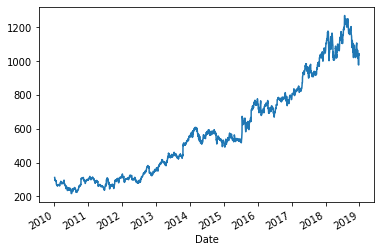

In [ ]:
goog.plot();

In [ ]:
Ntest = 30
train = goog.iloc[:-Ntest]
test = goog.iloc[-Ntest:]

In [ ]:
model = pm.auto_arima(train,
                      error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=False)

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=16270.771, BIC=16305.035, Time=1.015 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=16270.383, BIC=16281.804, Time=0.084 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=16269.726, BIC=16286.858, Time=0.146 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=16269.492, BIC=16286.624, Time=0.352 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=16271.123, BIC=16276.833, Time=0.060 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=16268.077, BIC=16290.920, Time=0.679 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=16267.935, BIC=16296.488, Time=0.864 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=16268.277, BIC=16291.120, Time=0.669 seconds
Fit ARIMA(3,1,1)x(0,0,0,0) [intercept=True]; AIC=16266.968, BIC=16301.232, Time=0.769 seconds
Fit ARIMA(3,1,0)x(0,0,0,0) [intercept=True]; AIC=16264.983, BIC=16293.536, Time=0.720 seconds
Fit ARIMA(4,1,0)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -8127.491
Date:                Thu, 30 Jul 2020   AIC                          16264.983
Time:                        19:09:22   BIC                          16293.536
Sample:                             0   HQIC                         16275.409
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3104      0.198      1.571      0.116      -0.077       0.698
ar.L1          0.0378      0.012      3.152      0.002       0.014       0.061
ar.L2         -0.0410      0.013     -3.241      0.001      -0.066      -0.016
ar.L3          0.0488      0.012      4.031      0.000       0.025       0.073
sigma2        85.1623      1.033     82.421      0.000      83.137      87.187
===================================================================================
Ljung-Box (Q):                       94.80   Jarque-Bera (JB):             11790.07
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               6.78   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (3, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': None,
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [ ]:
def plot_result(model, fulldata, train, test):
  params = model.get_params()
  d = params['order'][1]

  train_pred = model.predict_in_sample(start=d, end=-1)
  test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(fulldata.index, fulldata, label='data')
  ax.plot(train.index[d:], train_pred, label='fitted')
  ax.plot(test.index, test_pred, label='forecast')
  ax.fill_between(test.index, \
                  confint[:,0], confint[:,1], \
                  color='red', alpha=0.3)
  ax.legend();

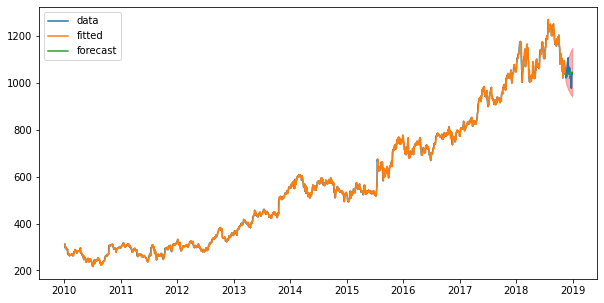

In [ ]:
plot_result(model, goog, train, test)

In [ ]:
def plot_test(model, test):
  test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(test.index, test, label='true')
  ax.plot(test.index, test_pred, label='forecast')
  ax.fill_between(test.index, \
                  confint[:,0], confint[:,1], \
                  color='red', alpha=0.3)
  ax.legend();

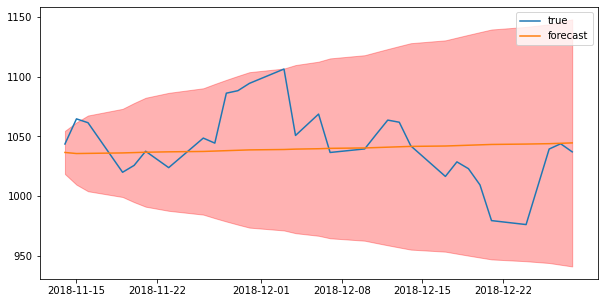

In [ ]:
plot_test(model, test)

In [ ]:
def rmse(y, t):
  return np.sqrt(np.mean((t - y)**2))

In [ ]:
print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: 30.43660198313072
RMSE Naive: 30.029502477261502


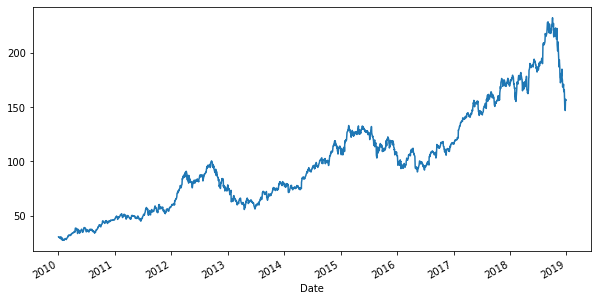

In [ ]:
aapl = df[df['Name'] == 'AAPL']['Close']
# aapl = np.log(df[df['Name'] == 'AAPL']['Close'])
aapl.plot();

In [ ]:
train = aapl.iloc[:-Ntest]
test = aapl.iloc[-Ntest:]

In [ ]:
model = pm.auto_arima(train,
                      error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=False)

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=8570.296, BIC=8604.560, Time=0.957 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=8575.329, BIC=8586.750, Time=0.084 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=8574.709, BIC=8591.841, Time=0.146 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=8574.392, BIC=8591.524, Time=0.320 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=8577.622, BIC=8583.333, Time=0.069 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=8571.650, BIC=8600.203, Time=0.581 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=8571.332, BIC=8599.886, Time=0.882 seconds
Fit ARIMA(3,1,2)x(0,0,0,0) [intercept=True]; AIC=8572.500, BIC=8612.475, Time=1.056 seconds
Fit ARIMA(2,1,3)x(0,0,0,0) [intercept=True]; AIC=8572.527, BIC=8612.502, Time=1.222 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=8574.574, BIC=8597.417, Time=0.704 seconds
Fit ARIMA(1,1,3)x(0,0,0,0) [intercep

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4279.148
Date:                Thu, 30 Jul 2020   AIC                           8570.296
Time:                        19:19:11   BIC                           8604.560
Sample:                             0   HQIC                          8582.808
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0803      0.042      1.896      0.058      -0.003       0.163
ar.L1          0.3755      0.165      2.279      0.023       0.053       0.699
ar.L2         -0.4239      0.176     -2.407      0.016      -0.769      -0.079
ma.L1         -0.3433      0.172     -2.002      0.045      -0.679      -0.007
ma.L2          0.3579      0.183      1.958      0.050      -0.000       0.716
sigma2         2.7182      0.039     69.453      0.000       2.642       2.795
===================================================================================
Ljung-Box (Q):                       87.16   Jarque-Bera (JB):              6223.04
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.23   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

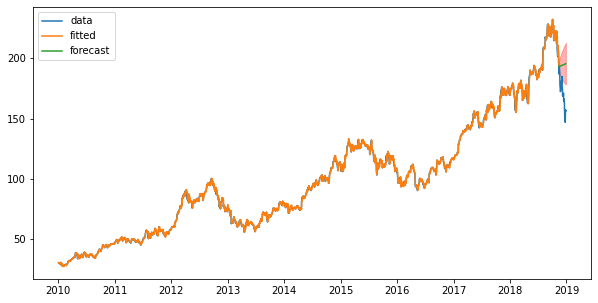

In [ ]:
plot_result(model, aapl, train, test)

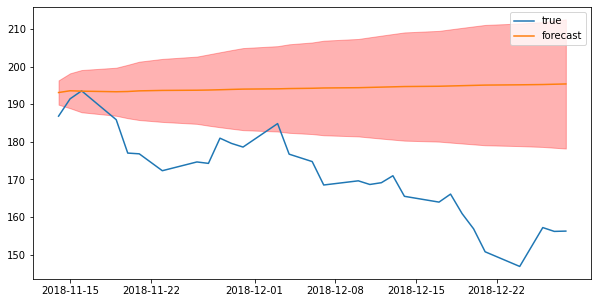

In [ ]:
plot_test(model, test)

In [ ]:
print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: 26.094961584683343
RMSE Naive: 24.027120586673817


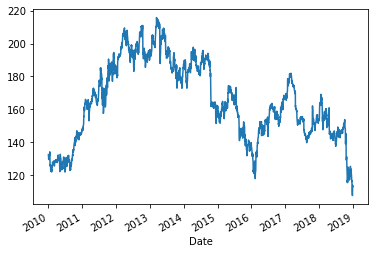

In [ ]:
ibm = df[df['Name'] == 'IBM']['Close']
# ibm = np.log(df[df['Name'] == 'IBM']['Close'])
ibm.plot();

In [ ]:
train = ibm.iloc[:-Ntest]
test = ibm.iloc[-Ntest:]

In [ ]:
model = pm.auto_arima(train,
                      error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=False)

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=9442.954, BIC=9477.218, Time=1.034 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=9436.082, BIC=9447.504, Time=0.086 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=9437.603, BIC=9454.735, Time=0.145 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=9437.589, BIC=9454.721, Time=0.348 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=9434.097, BIC=9439.808, Time=0.067 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=9439.637, BIC=9462.479, Time=0.676 seconds
Total fit time: 2.364 seconds


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4716.049
Date:                Thu, 30 Jul 2020   AIC                           9434.097
Time:                        19:21:54   BIC                           9439.808
Sample:                             0   HQIC                          9436.183
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.0067      0.055     72.559      0.000       3.898       4.115
===================================================================================
Ljung-Box (Q):                       42.47   Jarque-Bera (JB):              5352.76
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.77
Prob(H) (two-sided):                  0.03   Kurtosis:                        10.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

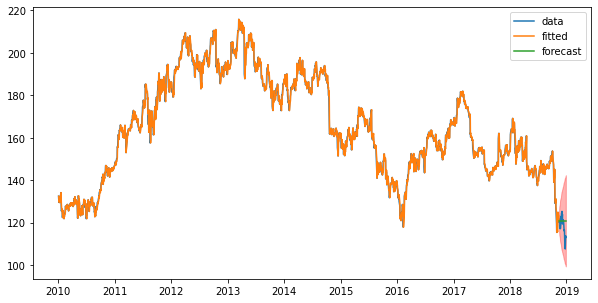

In [ ]:
plot_result(model, ibm, train, test)

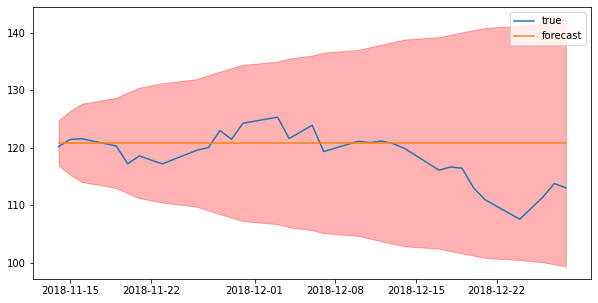

In [ ]:
plot_test(model, test)

In [ ]:
print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: 4.763157130051095
RMSE Naive: 4.763157130051095


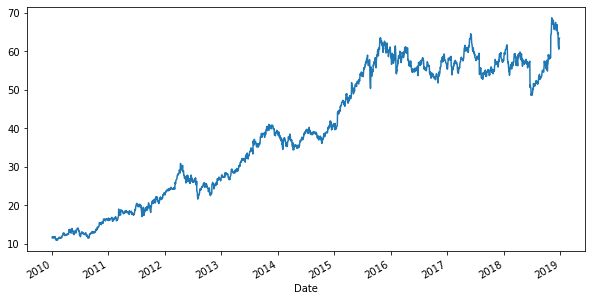

In [ ]:
sbux = df[df['Name'] == 'SBUX']['Close']
# sbux = np.log(df[df['Name'] == 'SBUX']['Close'])
sbux.plot();

In [ ]:
train = sbux.iloc[:-Ntest]
test = sbux.iloc[-Ntest:]

In [ ]:
model = pm.auto_arima(train,
                      error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=False)

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=3858.919, BIC=3893.183, Time=0.955 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=3851.895, BIC=3863.317, Time=0.377 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=3853.862, BIC=3870.994, Time=0.138 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=3853.860, BIC=3870.992, Time=0.352 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=3854.154, BIC=3859.864, Time=0.081 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=3855.861, BIC=3878.704, Time=0.428 seconds
Total fit time: 2.339 seconds


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1923.948
Date:                Thu, 30 Jul 2020   AIC                           3851.895
Time:                        19:25:53   BIC                           3863.317
Sample:                             0   HQIC                          3856.066
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0250      0.012      2.048      0.041       0.001       0.049
sigma2         0.3283      0.003     94.371      0.000       0.321       0.335
===================================================================================
Ljung-Box (Q):                       43.48   Jarque-Bera (JB):             18901.16
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               3.80   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

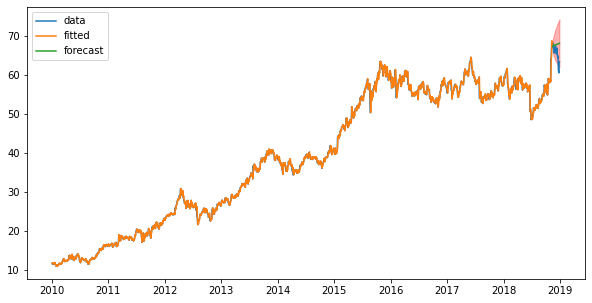

In [ ]:
plot_result(model, sbux, train, test)

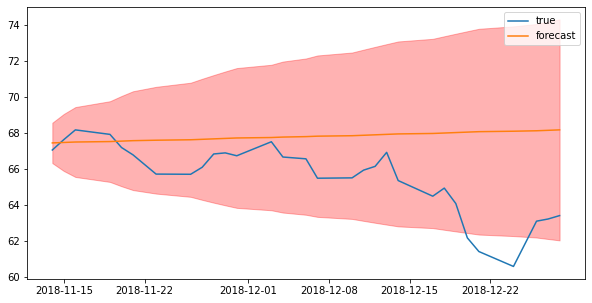

In [ ]:
plot_test(model, test)

In [ ]:
print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: 3.094903479339405
RMSE Naive: 2.6889385763409135
